In [1]:
from numpy import load
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



nu
[  0.47317561   0.47364167   0.47410864 ... 236.37079595 236.50620759
 236.64158153]
Tsig
[ 0.00000000e+00 -8.56770291e-09 -8.51986238e-09 ...  2.65184016e-03
  2.64729438e-03  2.64276187e-03]


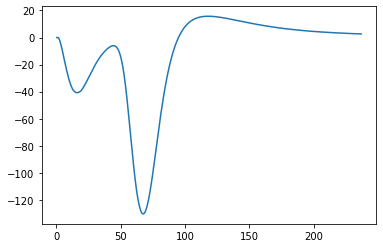

In [5]:
data = load("signal.npz")
lst = data.files
for item in lst:
    print(item)
    print(data[item])
nu = data['nu']
nu6 = data['nu']*1E6 
Tsig = data['Tsig']
Tsig3 = data['Tsig']*1E3
plt.plot(nu,Tsig3)
#print(Tsig3)

In [6]:
nu0 = 20E6 #hz
def func(x,a,b,c):
    return a*(x/nu0)**b + c

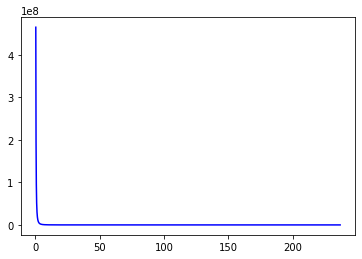

In [7]:
T2 = func(nu6,40000,-2.5,0)
Tdata = T2 + Tsig
#print(Tdata)
plt.plot(nu,Tdata,'b-',label = 'data')

In [8]:
popt,pcov = curve_fit(func,nu6,Tdata)
popt

array([ 4.00000000e+04, -2.50000000e+00, -8.14033128e-03])

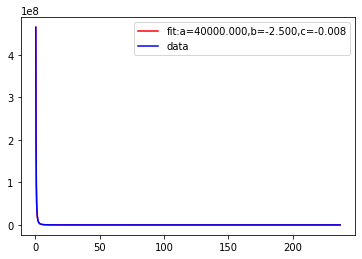

In [9]:
plt.plot(nu,func(nu6,*popt),'r-',label = 'fit:a=%5.3f,b=%5.3f,c=%5.3f' %tuple(popt))
plt.plot(nu,Tdata,'b-',label = 'data')
plt.legend()

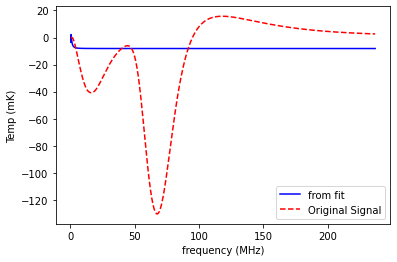

In [11]:
fit = func(nu6,*popt)
Tsig_fit = (fit - T2)*1E3
plt.plot(nu,Tsig_fit,'b-',label='from fit')
plt.plot(nu,Tsig3,'r--',label = 'Original Signal')
plt.xlabel("frequency (MHz)")
plt.ylabel("Temp (mK)")
plt.legend()